## Summary 

### Example 1 - The Famous Titanic dataset

- 1.Missing Values
- 2.Categorical Values
- 3.string manipulation
- 4.Group Aggregation



### Example 2 - MovieLens dataset

- 1.Sort_values & Values_counts
- 2.Group Aggregation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
cd ~/Desktop/Academic/Python_Sharing/Data/

/Users/Aaron/Desktop/Academic/Python_Sharing/Data


### Example 1 - The Famous Titanic dataset

In [4]:
titanic_raw = pd.read_csv('N5_Titanic.csv')
titanic_raw.head();

- Dealing with Null values

In [5]:
titanic_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_raw['Age'] = titanic_raw['Age'].fillna(titanic_raw['Age'].median())

In [7]:
titanic_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
## embarked aslo has missing values. Since S appeared 644 times, we set missing values to S
titanic_raw['Embarked'] = titanic_raw['Embarked'].fillna('S')

- Dealing with Categorical Variables

In [9]:
titanic_raw.ix[titanic_raw['Sex'] == 'female','Sex'] = 0
titanic_raw.ix[titanic_raw['Sex'] == 'male', 'Sex'] = 1
## titanic_raw['Sex'] = titanic_raw['Sex'].map({'female':0, 'male':1})

In [10]:
## Use the pandas's get_dummies method
dummies = pd.get_dummies(titanic_raw['Embarked'], prefix = 'Embarked')
titanic_clean = pd.concat([titanic_raw, dummies], axis = 1)
titanic_clean.head();

- Adding New Features

In [11]:
titanic_clean['family_size'] = titanic_clean['SibSp'] + titanic_clean['Parch']
titanic_clean['name_length'] = titanic_clean['Name'].apply(lambda x:len(x))
titanic_clean.head() ;

- how many females embarked from location ‘S’?

In [12]:
titanic_raw[(titanic_raw['Sex'] == 0) & (titanic_raw['Embarked'] == 'S') ].shape[0]

205

- how many values in column “Name” have “Mr.” contained in them?

In [13]:
(titanic_raw['Name'].str.find('Mr')>0).sum()

647

- find number of values in “Name” that starts with “F”.

In [14]:
titanic_raw['Name'].str.startswith('F').sum()

31

- Add a column Pclass_perc that first find percentage of each Pclass then map it to each passanger

In [15]:
titanic_raw['Pclass_perc'] = titanic_raw['Pclass'].map(titanic_raw['Pclass'].value_counts()/ titanic_raw.shape[0])
titanic_raw.head();

### Example 2 - MovieLens dataset

In [16]:
## Read in data

# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('N5_MovieLens/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('N5_MovieLens/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('N5_MovieLens/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [17]:
lens.head();

- 1.What are the 25 most rated movies?

In [18]:
lens.groupby('title').size().sort_values(ascending = False)[:5]

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
dtype: int64

In [19]:
lens['title'].value_counts()[:5]

Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: title, dtype: int64

- 2.Which movies are most highly rated?

In [20]:
lens.groupby('title').agg({'rating':'mean'}).sort_values('rating', ascending = False)[:5]

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [21]:
lens_2 = lens.groupby('title').agg({'rating':['size', 'mean']})
lens_2.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [22]:
lens_2.sort_values(('rating', 'mean'), ascending=False)[:5]

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [23]:
lens_2[lens_2['rating']['size']>=100].sort_values(('rating', 'mean'), ascending=False)[:5]

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

- 3.Which movies are most controversial amongst different ages?

In [24]:
lens['movie_id'] = lens.groupby('title').transform('count')['movie_id']
lens.head();

In [25]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates().reset_index(drop = True).head()

,age,age_group
0,60,60-69
1,21,20-29
2,33,30-39
3,30,30-39
4,23,20-29


In [26]:
lens[lens['movie_id'] >=300].groupby([ 'age_group','title']).agg({'rating':'mean'}).reset_index();

- 4.Which movies do men and women most disagree on?

In [27]:
pivoted = lens.pivot_table(index=['movie_id', 'title'], columns=['sex'], values='rating', fill_value=0)
pivoted.head();

In [28]:
pivoted['Diff'] = pivoted['F'] - pivoted['M']
pivoted = pivoted.reset_index('movie_id')

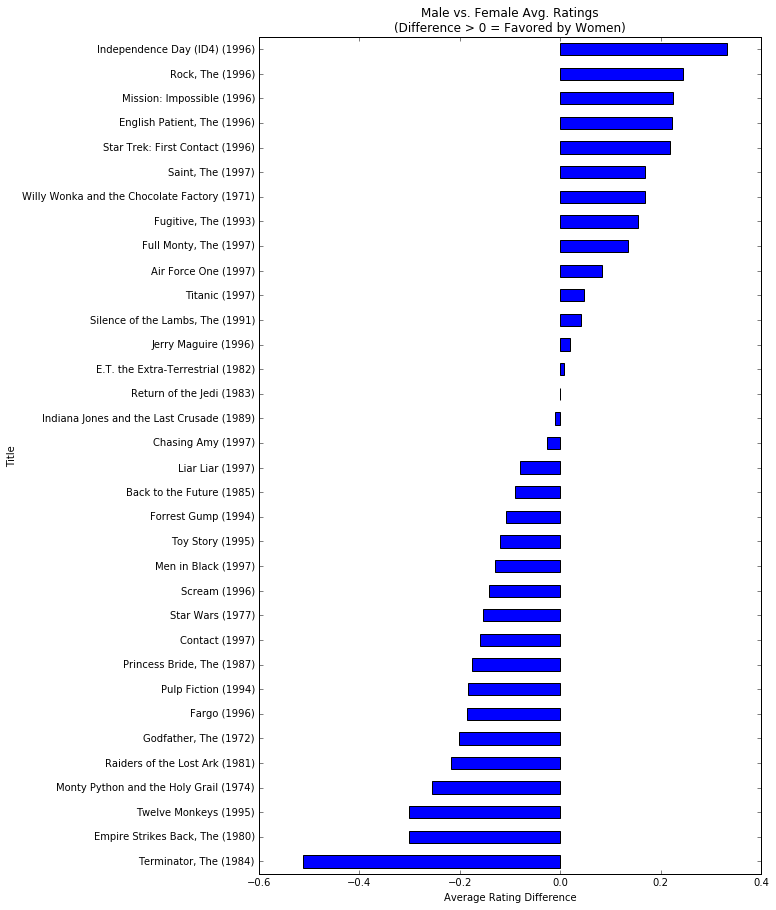

In [29]:
pivoted.ix[pivoted['movie_id']>=300, 'Diff'].sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Women)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');